In [1]:
%load_ext autoreload
%autoreload 2
%cd "~/deepshape/deepshape"

/home/jorgen/deepshape/deepshape


In [2]:
import time
import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt

In [9]:
from curves import *
from layers import *
from palais_layer import *
from visual import *
from networks import ReparametrizationNetwork1D, train

In [15]:
# Figures folder
figdir = "/home/jorgen/deepshape/figures/"

# Instantiate curves and transforms (from curves library)
g = LogStepDiff
c1 = Circle
c2 = c1.compose(g)

# Take Qmaps
q, r = Qmap(c2), Qmap(c1)

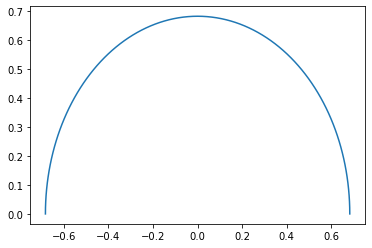

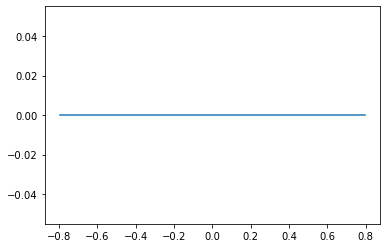

In [14]:
c1 = Curve((
    lambda x: torch.cos(np.pi * x) / (np.pi)**(1/3),
    lambda x: torch.sin(np.pi * x) / (np.pi)**(1/3)
))

c2 = Curve((
    lambda x: (1 - 2*x) / (2**(1/3)),
    lambda x: torch.zeros_like(x)
))

# c2 = c2.compose(g)

plot_curve(c1)
plot_curve(c2)

# Take Qmaps
q, r = Qmap(c2), Qmap(c1)

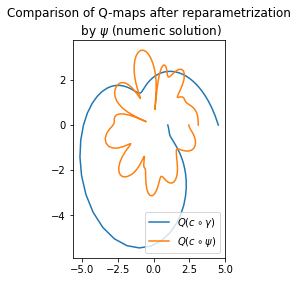

In [16]:
RN = ReparametrizationNetwork1D(2, 20, init_scale=1.)
# Create Plotting Data to verify reparametrizations
x = torch.linspace(0, 1, 201).unsqueeze(-1)
z, y = RN(x)
z, y = z.detach(), y.detach()
Q, R = q(x), RN.reparametrized(r, x)
R = R.detach()

# .. and after reparametrization
plt.subplot(1, 2, 2)
plt.plot(Q[:, 0], Q[:, 1], label="$Q(c \circ \gamma)$")
plt.plot(R[:, 0], R[:, 1], label="$Q(c \circ \psi)$")
plt.title("Comparison of Q-maps after reparametrization\n by $\psi$ (numeric solution)")
plt.legend()
plt.savefig(figdir + "qmaps.png")

plt.show()

In [60]:
diff1 = c1.subtract(c2)

In [7]:
with torch.no_grad():
    c2after = c1.compose(lambda x: RN(x)[0])
    diff2 = c1.subtract(rafter)
    plot_curve(diff1)
    plot_curve(diff2)


NameError: name 'rafter' is not defined

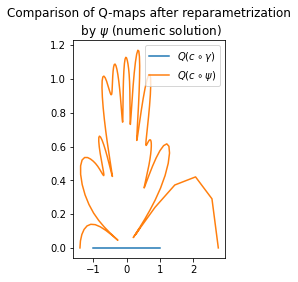

In [58]:
RN = ReparametrizationNetwork1D(2, 20, init_scale=1.)
# Create Plotting Data to verify reparametrizations
x = torch.linspace(0, 1, 201).unsqueeze(-1)
z, y = RN(x)
z, y = z.detach(), y.detach()
Q, R = q(x), RN.reparametrized(r, x)
R = R.detach()

# .. and after reparametrization
plt.subplot(1, 2, 2)
plt.plot(Q[:, 0], Q[:, 1], label="$Q(c \circ \gamma)$")
plt.plot(R[:, 0], R[:, 1], label="$Q(c \circ \psi)$")
plt.title("Comparison of Q-maps after reparametrization\n by $\psi$ (numeric solution)")
plt.legend()
plt.savefig(figdir + "qmaps.png")

plt.show()

[Iter     1] loss: 2.80092
[Iter    11] loss: 1.06333
[Iter    21] loss: 0.23456
[Iter    31] loss: 0.04664
[Iter    41] loss: 0.03184
[Iter    51] loss: 0.00775
[Iter    61] loss: 0.00236
[Iter    71] loss: 0.00096
[Iter    81] loss: 0.00040
[Iter    91] loss: 0.00026
[Iter   101] loss: 0.00044
[Iter   111] loss: 0.00525
[Iter   121] loss: 0.00133
[Iter   131] loss: 0.00015
[Iter   141] loss: 0.00011
[Iter   151] loss: 0.00011
[Iter   161] loss: 0.00008
[Iter   171] loss: 0.00005
[Iter   181] loss: 0.00005
[Iter   191] loss: 0.00004

Finished training in 1.79244s


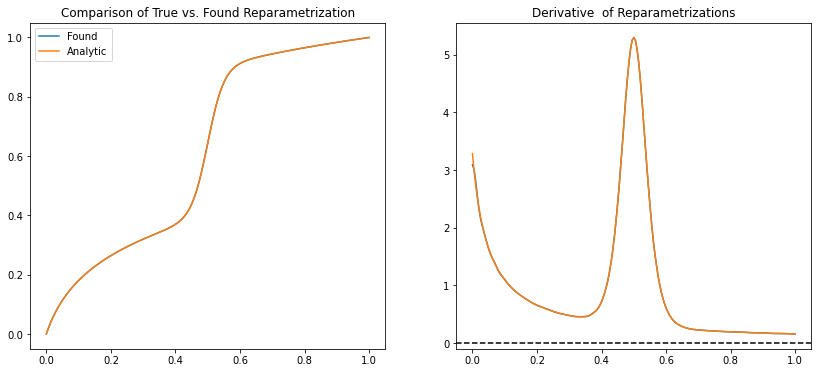

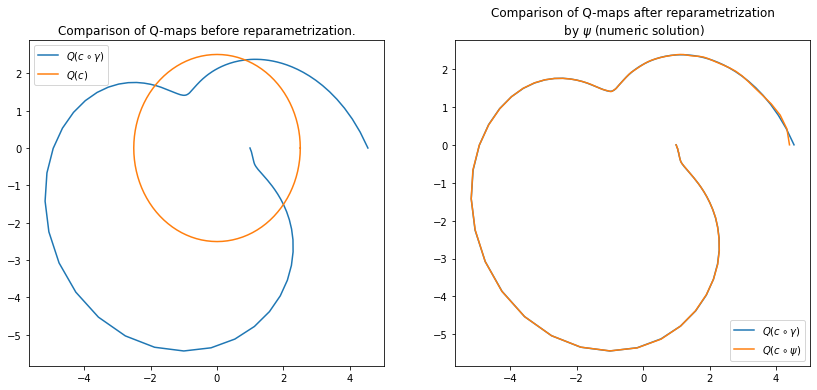

In [19]:
# Build network of L layers with N_l basis functions per layer
# RN = ReparametrizationNetwork1D(5, [1, 5, 10, 15, 20])
RN = ReparametrizationNetwork1D(10, 20, init_scale=0.)

# Choose and configure optimizer.
opt = optim.Adam(RN.parameters(), lr=1e-3)
# opt = optim.SGD(RN.parameters(), lr=1e-4, momentum=0.3)
train(q, r, RN, opt, iterations=200)

# Create Plotting Data to verify reparametrizations
x = torch.linspace(0, 1, 201).unsqueeze(-1)
z, y = RN(x)
z, y = z.detach(), y.detach()
Q, R = q(x), RN.reparametrized(r, x)
R = R.detach()

# Plot Diffeomorphism...
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(x, z, label="Found")
plt.plot(x, g(x), label="Analytic")
plt.title("Comparison of True vs. Found Reparametrization")
plt.legend()

# ... and derivative to check if strictly positive
plt.subplot(1, 2, 2)
plt.plot(x, y, label="Found")
plt.plot(x, g.derivative(x), label="Analytic")
plt.axhline(0, ls='--', c='k')
plt.title("Derivative  of Reparametrizations")
plt.savefig(figdir + "reparametrizations.png")
plt.show()


# Plot Q-maps, and compare 
plt.figure(figsize=(14, 6))

# Before 
plt.subplot(1, 2, 1)
plt.plot(q(x)[:, 0], q(x)[:, 1], label="$Q(c \circ \gamma)$")
plt.plot(r(x)[:, 0], r(x)[:, 1], label="$Q(c)$")
plt.title("Comparison of Q-maps before reparametrization.")
plt.legend()

# .. and after reparametrization
plt.subplot(1, 2, 2)
plt.plot(Q[:, 0], Q[:, 1], label="$Q(c \circ \gamma)$")
plt.plot(R[:, 0], R[:, 1], label="$Q(c \circ \psi)$")
plt.title("Comparison of Q-maps after reparametrization\n by $\psi$ (numeric solution)")
plt.legend()
plt.savefig(figdir + "qmaps.png")

plt.show()

[Iter     1] loss: 2.80092
[Iter    11] loss: 0.31565
[Iter    21] loss: 0.18993
[Iter    31] loss: 0.06186
[Iter    41] loss: 0.01348
[Iter    51] loss: 0.00639
[Iter    61] loss: 0.00436
[Iter    71] loss: 0.00225
[Iter    81] loss: 0.00155
[Iter    91] loss: 0.00116
[Iter   101] loss: 0.00097
[Iter   111] loss: 0.00082
[Iter   121] loss: 0.00071
[Iter   131] loss: 0.00062
[Iter   141] loss: 0.00056
[Iter   151] loss: 0.00050
[Iter   161] loss: 0.00046
[Iter   171] loss: 0.00042
[Iter   181] loss: 0.00039
[Iter   191] loss: 0.00036

Finished training in 3.14572s


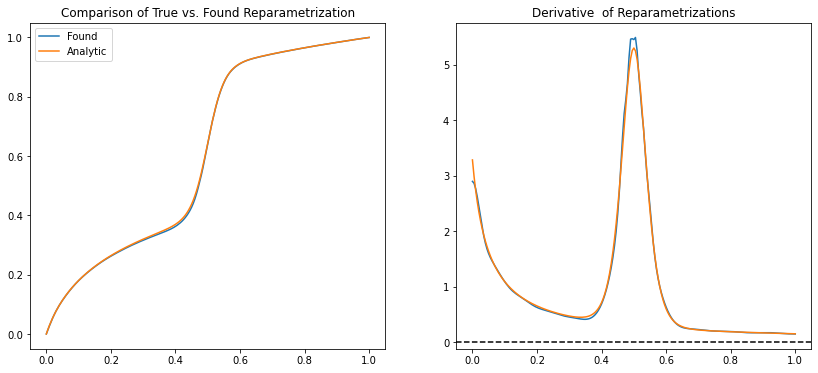

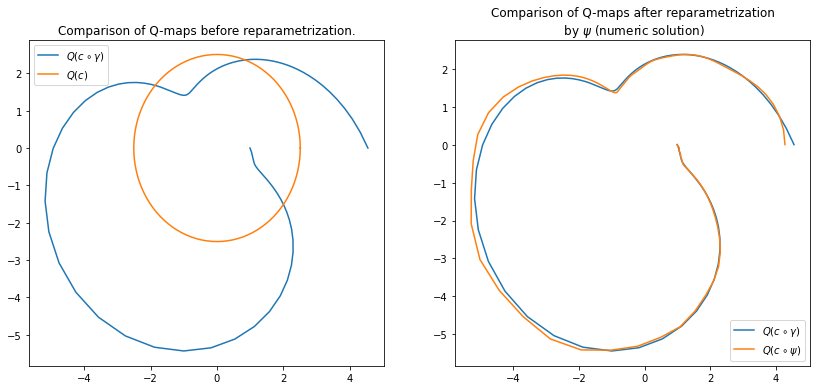

In [24]:
# Build network of L layers with N_l basis functions per layer
# RN = ReparametrizationNetwork1D(5, [1, 5, 10, 15, 20])
# RN = ReparametrizationNetwork1D(2, 20, init_scale=1.)
RN = ReparametrizationNetwork1D(20, 10, init_scale=0., layer_type=PalaisLayer1D)


# Choose and configure optimizer.
opt = optim.Adam(RN.parameters(), lr=1e-2)
# opt = optim.SGD(RN.parameters(), lr=1e-4, momentum=0.3)
train(q, r, RN, opt, iterations=200)

# Create Plotting Data to verify reparametrizations
x = torch.linspace(0, 1, 201).unsqueeze(-1)
z, y = RN(x)
z, y = z.detach(), y.detach()
Q, R = q(x), RN.reparametrized(r, x)
R = R.detach()

# Plot Diffeomorphism...
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(x, z, label="Found")
plt.plot(x, g(x), label="Analytic")
plt.title("Comparison of True vs. Found Reparametrization")
plt.legend()

# ... and derivative to check if strictly positive
plt.subplot(1, 2, 2)
plt.plot(x, y, label="Found")
plt.plot(x, g.derivative(x), label="Analytic")
plt.axhline(0, ls='--', c='k')
plt.title("Derivative  of Reparametrizations")
plt.show()


# Plot Q-maps, and compare 
plt.figure(figsize=(14, 6))

# Before 
plt.subplot(1, 2, 1)
plt.plot(q(x)[:, 0], q(x)[:, 1], label="$Q(c \circ \gamma)$")
plt.plot(r(x)[:, 0], r(x)[:, 1], label="$Q(c)$")
plt.title("Comparison of Q-maps before reparametrization.")
plt.legend()

# .. and after reparametrization
plt.subplot(1, 2, 2)
plt.plot(Q[:, 0], Q[:, 1], label="$Q(c \circ \gamma)$")
plt.plot(R[:, 0], R[:, 1], label="$Q(c \circ \psi)$")
plt.title("Comparison of Q-maps after reparametrization\n by $\psi$ (numeric solution)")
plt.legend()

plt.show()

In [2]:
plt.plot(x, g(x) - z)

NameError: name 'plt' is not defined